<a href="https://colab.research.google.com/github/BlackBoyZeus/visionconsult/blob/main/Copy_of_Image_Segmentation_with_UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation with UNet


In [ ]:
# prompt: import and mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


This guide covers learning end-to-end Image Segmentation with Keras and Tensorflow.

When the guide is completed, it will be able to develop Image Segmentation algorithms with U-Net architecture.

- E-mail: rem.imanjefferson@gmail.com
- Github: https://github.com/BlackBoyZeus
- Linkedin: https://www.linkedin.com/in/boypotus/

![picture](https://nanonets.com/blog/content/images/2018/11/1_rZ1vDrOBWqISFiNL5OMEbg.jpeg)

# Contents

  1.   Semantic Segmentation
  2.   UNet
  3.   Binary Segmentation
  4.   Multi-Class Segmentation

# 1. Semantic Segmentation
***Semantic Segmentation*** or ***Image Segmentation*** is a deep learning algorithm that associates each pixel in an image with a tag or category. For example, an autonomous vehicle; must identify vehicles, pedestrians, traffic signs, sidewalks, and other road features. All these processes can be performed using the image segmentation technique.

The application areas are:
- Autonomous Driving
- Industrial Application
- Satellite Images
- Medical Imaging
- Robotics

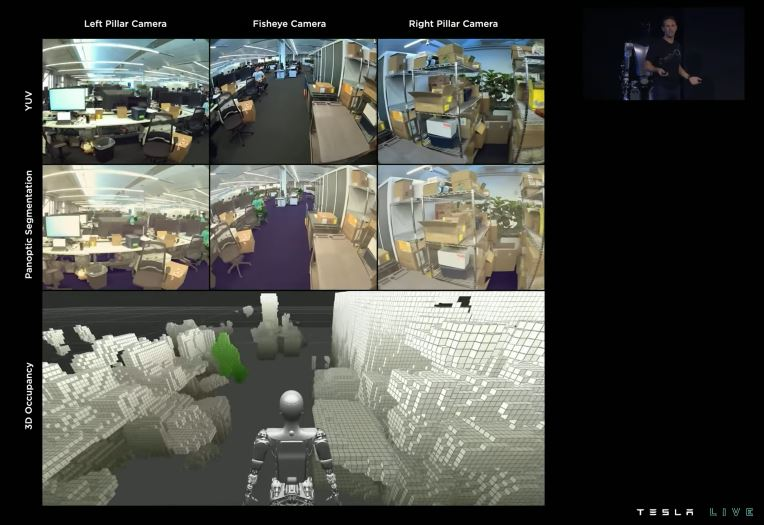

https://www.youtube.com/watch?v=ODSJsviD_SU (min 47.27)

# 2. UNet


U-Net is a convolutional neural network developed by researchers at the University of Freiburg for segmentation biomedical images.

![picture](https://gholste.me/publication/holste-spie-2020/featured_hu005251c37a4f49559965411aa987786b_649805_720x0_resize_lanczos_2.png)

The network architecture is based on the fully convolutional network and has been modified and expanded to work with fewer training images and provide more precise segmentations. Also, this network is so fast that it takes less than 1 second on the GPU to segment a 512x512 image. (https://en.wikipedia.org/wiki/U-Net)

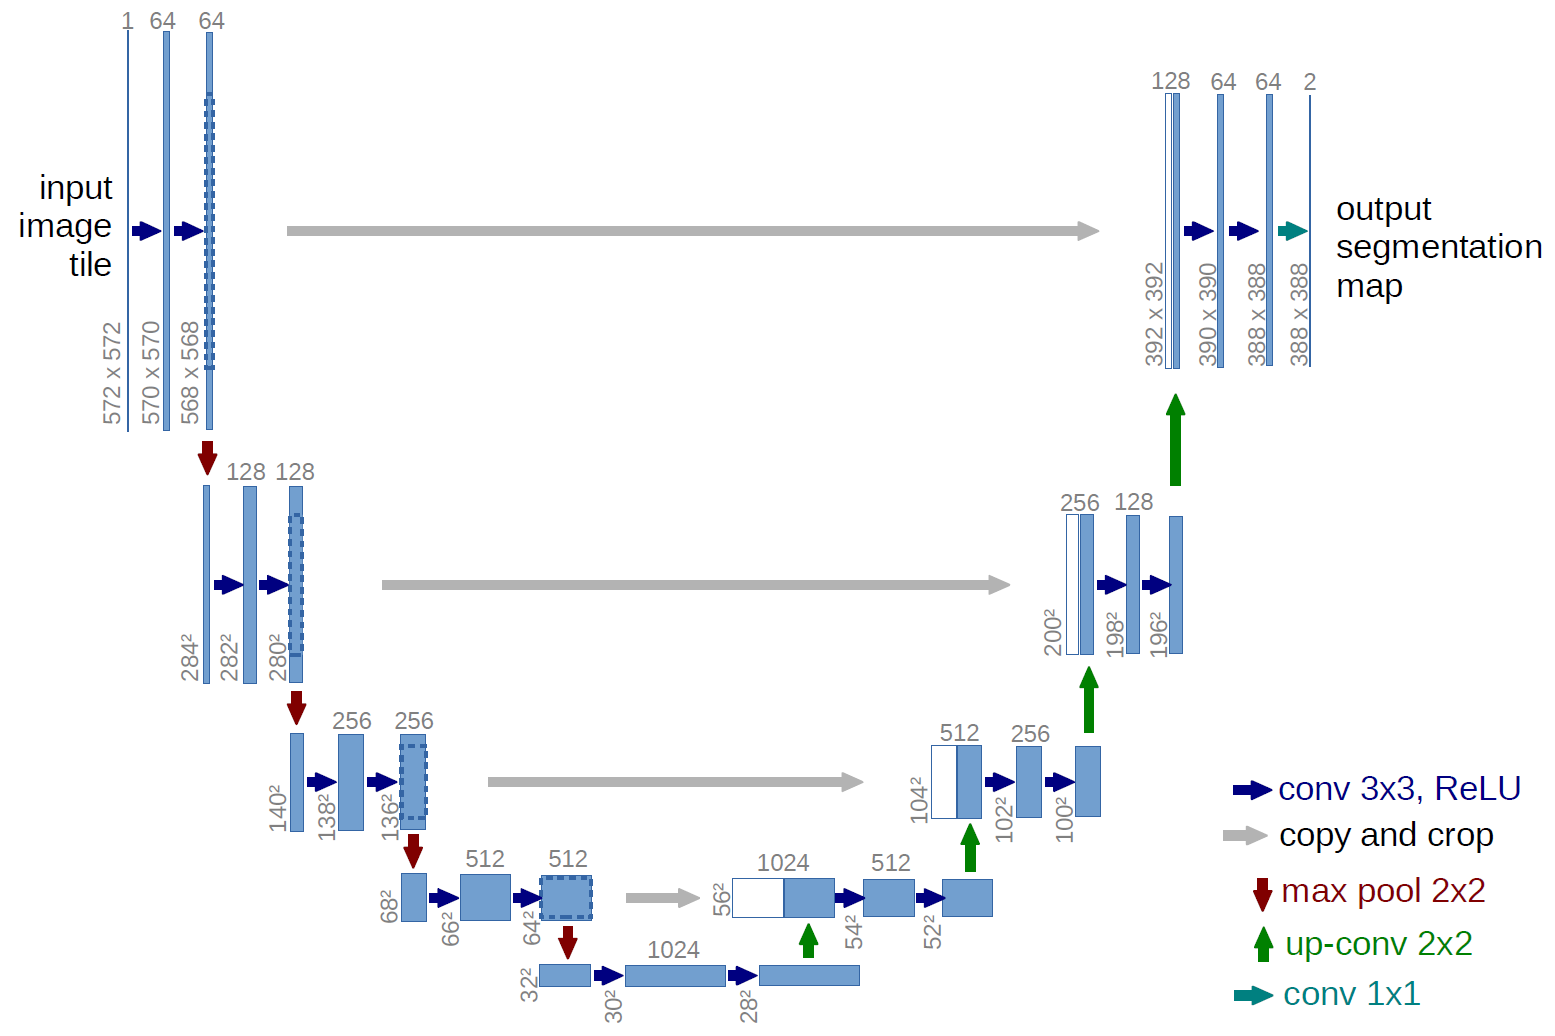

UNet architecture consists of 3 parts:
- Encoder
- Decoder
- Skip Connection

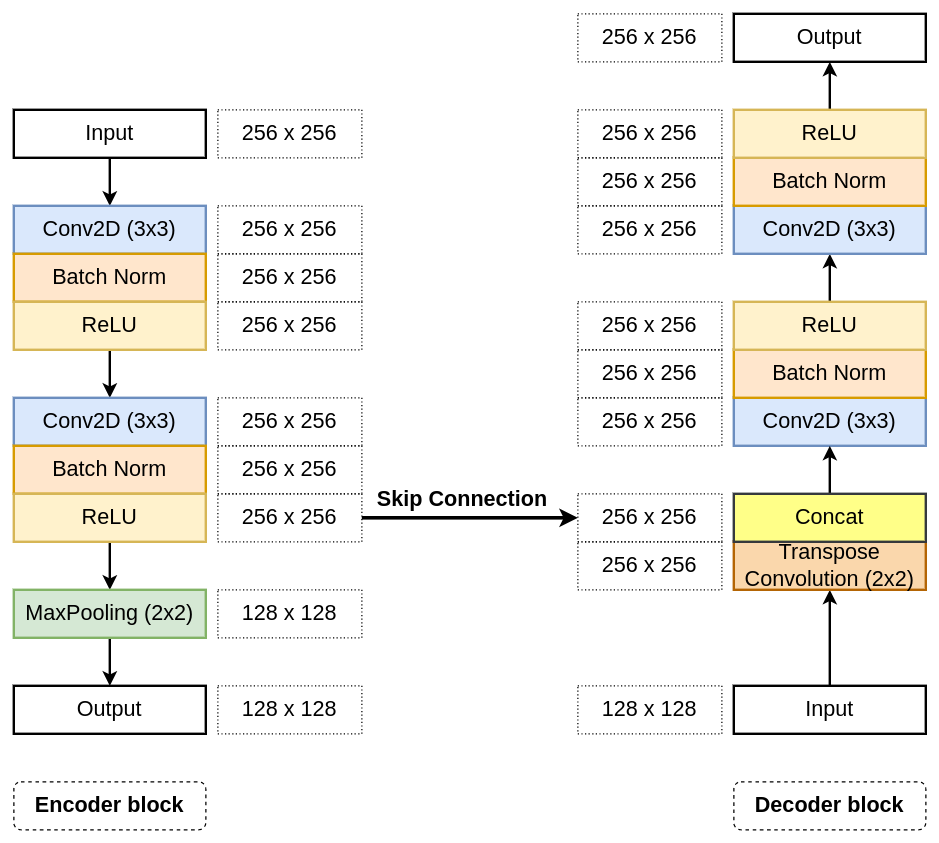

- Let's examine the simplified version of UNet architecture and start coding with Keras.

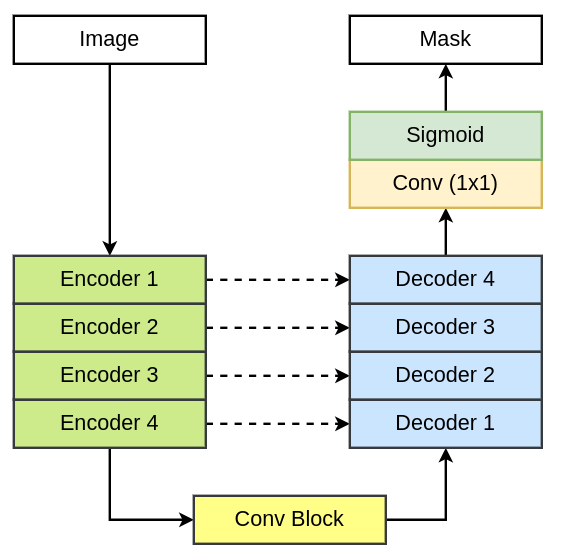

In [ ]:
# import libraries
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input

In [ ]:
# convolution block
def conv_block(inputs, num_filters):
  x = Conv2D(num_filters, 3, padding="same")(inputs)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Conv2D(num_filters, 3, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  return x

In [ ]:
#encoder block
def encoder_block(inputs, num_filters):
  x = conv_block(inputs, num_filters)
  p = MaxPool2D((2,2))(x)

  return x, p

In [ ]:
#decoder block
def decoder_block(inputs, skip ,num_filters):
  x = Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(inputs)
  x = Concatenate()([x, skip])
  x = conv_block(x, num_filters)

  return x

In [ ]:
# unet
def build_unet(input_shape):
  inputs = Input(input_shape)

  # encoder blocks
  s1, p1 = encoder_block(inputs, 64)
  s2, p2 = encoder_block(p1, 128)
  s3, p3 = encoder_block(p2, 256)
  s4, p4 = encoder_block(p3, 512)

  # bridge
  b1 = conv_block(p4, 1024)

  # decoder
  d1 = decoder_block(b1, s4, 512)
  d2 = decoder_block(d1, s3, 256)
  d3 = decoder_block(d2, s2, 128)
  d4 = decoder_block(d3, s1, 64)

  outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

  model = Model(inputs, outputs, name="UNET")

  return model

In [ ]:
input_shape = (256,256,3)
model = build_unet(input_shape)

In [ ]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

# 3. Binary Segmentation


Binary Semantic Segmentation is the process of separating the pixels of an image into two categories. Pixels of foreground objects of an image and pixels of background objects of an image.

Image segmentation is a major challenge in image processing and computer vision in many applications, from background subtraction to object tracking.

![picture](https://camo.githubusercontent.com/773d2b494242e988b627634f016969c990f80289fd385c86e958c952a8f7775e/68747470733a2f2f686162726173746f726167652e6f72672f776562742f62632f65672f67382f6263656767387a6467642d636f2d6c69703668786e3937366a646d2e6a706567)

In this example, we will perform segmentation on mitochondria in images examined with a microscope. To download the dataset, you can use the link below or the Google Drive link that I shared with you in the course materials:
- https://www.epfl.ch/labs/cvlab/data/data-em/

After downloading the dataset, upload it to Google Drive.

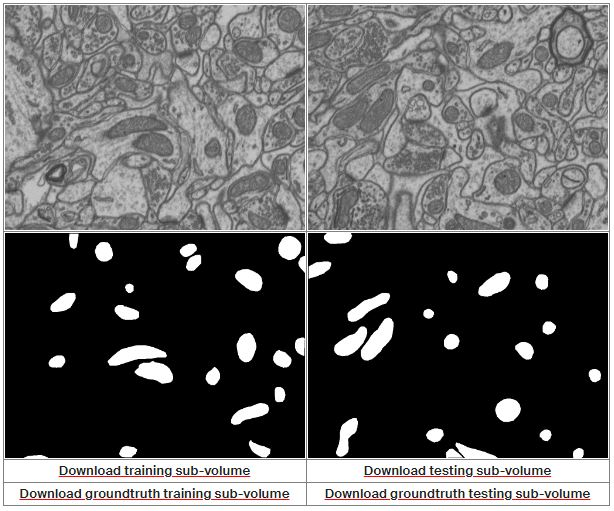

In [ ]:
%cd /content/drive/MyDrive/UNET27

/content/drive/MyDrive/UNET27


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/test/
   creating: dataset/test/data/
  inflating: dataset/test/data/test0.tif  
  inflating: dataset/test/data/test1.tif  
  inflating: dataset/test/data/test10.tif  
  inflating: dataset/test/data/test100.tif  
  inflating: dataset/test/data/test101.tif  
  inflating: dataset/test/data/test102.tif  
  inflating: dataset/test/data/test103.tif  
  inflating: dataset/test/data/test104.tif  
  inflating: dataset/test/data/test105.tif  
  inflating: dataset/test/data/test106.tif  
  inflating: dataset/test/data/test107.tif  
  inflating: dataset/test/data/test108.tif  
  inflating: dataset/test/data/test109.tif  
  inflating: dataset/test/data/test11.tif  
  inflating: dataset/test/data/test110.tif  
  inflating: dataset/test/data/test111.tif  
  inflating: dataset/test/data/test112.tif  
  inflating: dataset/test/data/test113.tif  
  inflating: dataset/test/data/test114.tif  
  inflating: dataset/test/data/test115.tif  
  inflating: dataset/test

In [ ]:
# importing libraries
import os
import cv2
import glob
import random

import numpy as np
from PIL import Image
from keras.optimizers import Adam

from matplotlib import pyplot as plt
from tensorflow.keras.utils import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input

Görüntüleri Hazırlama

In [ ]:
# define path for masks and images
image_directory = "/content/drive/MyDrive/UNET27/dataset/train/data"
mask_directory = "/content/drive/MyDrive/UNET27/dataset/train/label"

SIZE = 256

In [ ]:
image_data = []
mask_data = []

images = os.listdir(image_directory)
masks = os.listdir(mask_directory)

print(images)
print(masks)

['train0.tif', 'train1.tif', 'train10.tif', 'train100.tif', 'train101.tif', 'train102.tif', 'train103.tif', 'train104.tif', 'train105.tif', 'train106.tif', 'train107.tif', 'train108.tif', 'train109.tif', 'train11.tif', 'train110.tif', 'train111.tif', 'train112.tif', 'train113.tif', 'train114.tif', 'train115.tif', 'train116.tif', 'train117.tif', 'train118.tif', 'train119.tif', 'train12.tif', 'train120.tif', 'train121.tif', 'train122.tif', 'train123.tif', 'train124.tif', 'train125.tif', 'train126.tif', 'train127.tif', 'train128.tif', 'train129.tif', 'train13.tif', 'train130.tif', 'train131.tif', 'train132.tif', 'train133.tif', 'train134.tif', 'train135.tif', 'train136.tif', 'train137.tif', 'train138.tif', 'train139.tif', 'train14.tif', 'train140.tif', 'train141.tif', 'train142.tif', 'train143.tif', 'train144.tif', 'train145.tif', 'train146.tif', 'train147.tif', 'train148.tif', 'train149.tif', 'train15.tif', 'train150.tif', 'train151.tif', 'train152.tif', 'train153.tif', 'train154.tif', '

In [ ]:
for i, image_name in enumerate(images):
  if (image_name.split(".")[1]=="tif"):
    path = image_directory + "/" + image_name
    image = cv2.imread(path, 0)

    image = Image.fromarray(image)
    image = image.resize((SIZE,SIZE))

    image_data.append(np.array(image))

In [ ]:
for i, image_name in enumerate(masks):
  if (image_name.split(".")[1]=="tif"):
    path_mask = mask_directory + "/" + image_name
    image = cv2.imread(path_mask, 0)

    image = Image.fromarray(image)
    image = image.resize((SIZE,SIZE))

    mask_data.append(np.array(image))

In [ ]:
print(len(image_data))
print(len(mask_data))

165
165


In [ ]:
# normalize images
image_data = np.expand_dims(normalize(np.array(image_data),axis=1),3)
print(image_data.shape)

(165, 256, 256, 1)


In [ ]:
# normalize masks
mask_data = np.expand_dims(np.array(mask_data),3) / 255.
print(mask_data.shape)

(165, 256, 256, 1)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, mask_data,
                                                  test_size=0.10, random_state=0)

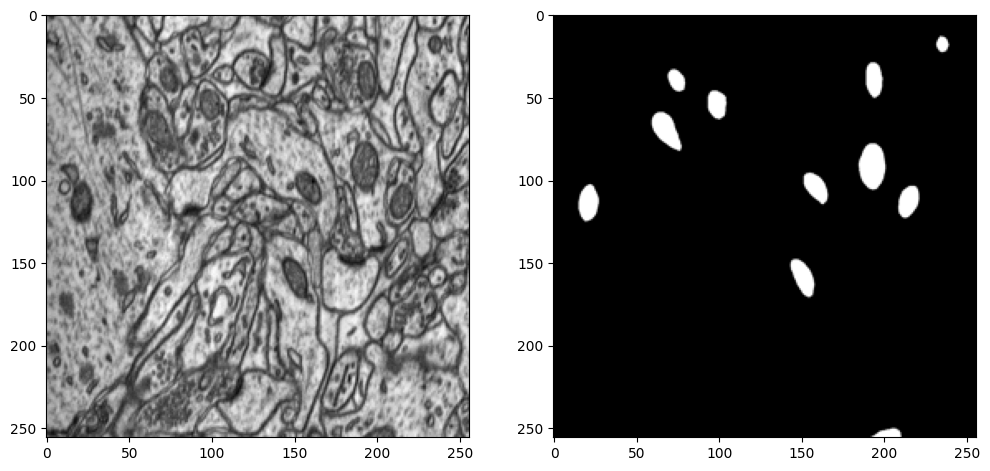

In [ ]:
image_number = random.randint(0, len(X_train))

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256,256)),cmap="gray")

plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256,256)),cmap="gray")

plt.show()

Model

In [ ]:
# convolution block
def conv_block(inputs, num_filters):
  x = Conv2D(num_filters, 3, padding="same")(inputs)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Conv2D(num_filters, 3, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  return x

In [ ]:
#encoder block
def encoder_block(inputs, num_filters):
  x = conv_block(inputs, num_filters)
  p = MaxPool2D((2,2))(x)

  return x, p

In [ ]:
#decoder block
def decoder_block(inputs, skip, num_filters):
  x = Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(inputs)
  x = Concatenate()([x, skip])
  x = conv_block(x, num_filters)
  return x

In [ ]:
# unet
def build_unet(input_shape):
  inputs = Input(input_shape)

  # Encoder
  s1, p1 = encoder_block(inputs, 64)
  s2, p2 = encoder_block(p1, 128)
  s3, p3 = encoder_block(p2, 256)
  s4, p4 = encoder_block(p3, 512)

  # Bridge
  b1 = conv_block(p4, 1024)

  # Decoder
  d1 = decoder_block(b1, s4, 512)
  d2 = decoder_block(d1, s3, 256)
  d3 = decoder_block(d2, s2, 128)
  d4 = decoder_block(d3, s1, 64)

  outputs = Conv2D(1, 1, padding = "same", activation = "sigmoid")(d4)

  model = Model(inputs, outputs, name="UNET")
  return model

In [ ]:
input_shape = (256,256,1)
model = build_unet(input_shape)

In [ ]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 64  640         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_18 (BatchN  (None, 256, 256, 64  256        ['conv2d_19[0][0]']              
 ormalization)                  )                                                              

In [ ]:
model.compile(optimizer = Adam(learning_rate=1e-3), loss="binary_crossentropy",
              metrics = ["accuracy"])

Eğitim (Training)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=16,
                    verbose = 1,
                    epochs = 100,
                    validation_data=(X_val, y_val),
                    shuffle=False)

Epoch 1/100
10/10 [==============================] - 52s 2s/step - loss: 0.6829 - accuracy: 0.6468 - val_loss: 0.8479 - val_accuracy: 0.2766
Epoch 2/100
10/10 [==============================] - 8s 764ms/step - loss: 0.2546 - accuracy: 0.9623 - val_loss: 1.4170 - val_accuracy: 0.1860
Epoch 3/100
10/10 [==============================] - 8s 767ms/step - loss: 0.1723 - accuracy: 0.9730 - val_loss: 2.9104 - val_accuracy: 0.0983
Epoch 4/100
10/10 [==============================] - 8s 765ms/step - loss: 0.1346 - accuracy: 0.9767 - val_loss: 3.6657 - val_accuracy: 0.1237
Epoch 5/100
10/10 [==============================] - 8s 774ms/step - loss: 0.1139 - accuracy: 0.9781 - val_loss: 0.5520 - val_accuracy: 0.8270
Epoch 6/100
10/10 [==============================] - 8s 775ms/step - loss: 0.0990 - accuracy: 0.9792 - val_loss: 0.6181 - val_accuracy: 0.7670
Epoch 7/100
10/10 [==============================] - 8s 775ms/step - loss: 0.0872 - accuracy: 0.9797 - val_loss: 0.5356 - val_accuracy: 0.8653
E

In [ ]:
# saving model
model_path = "/content/drive/MyDrive/UNET27/model.hdf5"
model.save(model_path)

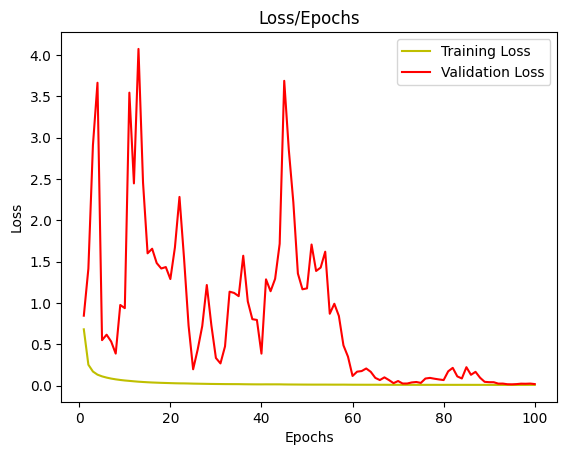

In [ ]:
# visualize loss/val_los
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "y", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")

plt.title("Loss/Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

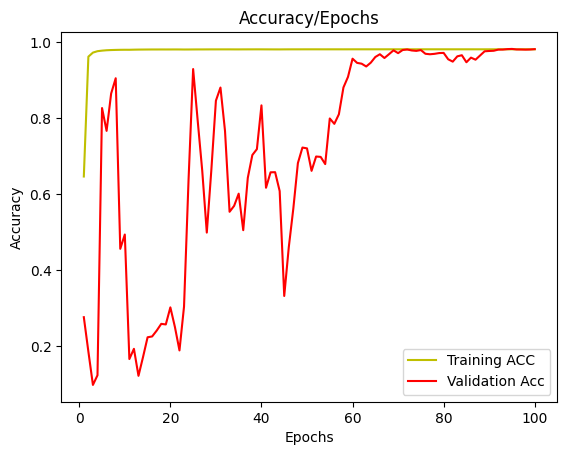

In [ ]:
# visualize acc/val_acc
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "y", label="Training ACC")
plt.plot(epochs, val_acc, "r", label="Validation Acc")

plt.title("Accuracy/Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

Prediction (Tespit)

In [ ]:
from keras.models import load_model
model = load_model(model_path)

In [ ]:
from tensorflow.keras.metrics import MeanIoU

y_prediction = model.predict(X_val)
y_prediction_thresholded = y_prediction > 0.5

1/1 [==============================] - 11s 11s/step


In [ ]:
num_classes = 2
IoU = MeanIoU(num_classes=num_classes)
IoU.update_state(y_prediction_thresholded, y_val)
print("Mean IoU: ", IoU.result().numpy())

Mean IoU:  0.9290353


1/1 [==============================] - 0s 24ms/step


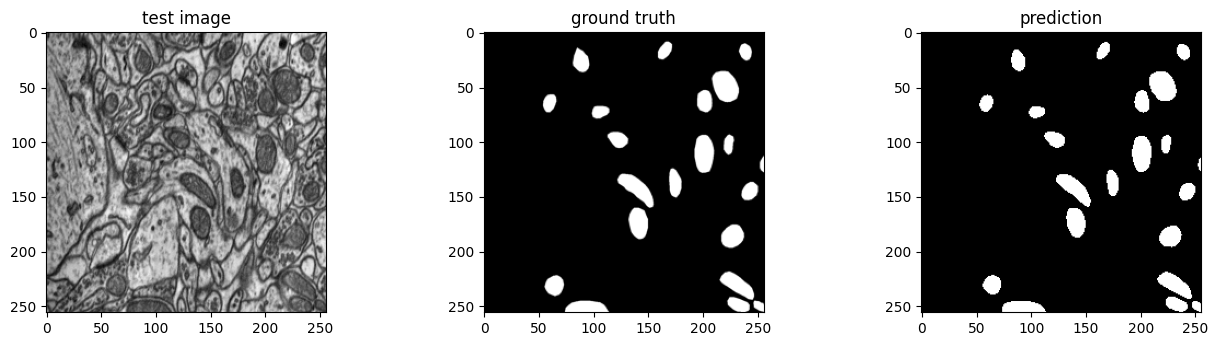

In [ ]:
threshold = 0.5
test_number = random.randint(0, len(X_val)-1)

test_img = X_val[test_number]
ground_truth = y_val[test_number]

test_input = np.expand_dims(test_img,0)
prediction = (model.predict(test_input)[0,:,:,0]>0.5).astype(np.uint8)

plt.figure(figsize=(16,8))

plt.subplot(231)
plt.title("test image")
plt.imshow(test_img[:,:,0],cmap="gray")

plt.subplot(232)
plt.title("ground truth")
plt.imshow(ground_truth[:,:,0],cmap="gray")

plt.subplot(233)
plt.title("prediction")
plt.imshow(prediction,cmap="gray")

plt.show()

# 5. Multiclass Image Segmentation


There are basically two classes in Binary Semantic Segmentation applications:
- Object
- Background

In Multi-Class Segmentation applications, there are more than 2 classes. For example:
- Cat
- Dog
- Background

![picture](https://d2l.ai/_images/segmentation.svg)

In this application, we will use the *Oxford IIT Pet* dataset.
- https://www.tensorflow.org/datasets/catalog/oxford_iiit_pet

![picture](https://assets.website-files.com/5d61c69f45d893b46d52758f/5d9ec124a410725bf3e835cd_Screenshot_577.jpg)

Library

In [ ]:
import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

Dataset

In [ ]:
dataset, info = tensorflow_datasets.load("oxford_iiit_pet:3.*.*", with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incomplete37C5MO/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incomplete37C5MO/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_path=PosixGPath('/tmp/tmpmi5a8kqutfds'),
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
        'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        

In [ ]:
print(dataset)

{'train': <_PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>, 'test': <_PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}


In [ ]:
print(dataset["train"])

<_PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


Preparing Images

In [ ]:
def data_resize(input_image, input_mask):
  input_image = tf.image.resize(input_image, (128,128), method="nearest")
  input_mask = tf.image.resize(input_mask, (128,128), method="nearest")

  return input_image, input_mask

In [ ]:
def data_augmentation(input_image, input_mask):
  input_image = tf.image.flip_left_right(input_image)
  input_mask = tf.image.flip_left_right(input_mask)

  return input_image, input_mask

In [ ]:
def data_normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1

  return input_image, input_mask

In [ ]:
def load_image_train(data):
  input_image = data["image"]
  input_mask = data["segmentation_mask"]

  input_image, input_mask = data_resize(input_image, input_mask)
  input_image, input_mask = data_augmentation(input_image, input_mask)
  input_image, input_mask = data_normalize(input_image, input_mask)

  return input_image, input_mask

In [ ]:
def load_image_test(data):
  input_image = data["image"]
  input_mask = data["segmentation_mask"]

  input_image, input_mask = data_resize(input_image, input_mask)
  input_image, input_mask = data_normalize(input_image, input_mask)

  return input_image, input_mask

In [ ]:
train_dataset = dataset["train"].map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = dataset["test"].map(load_image_test, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
print("[INFO].. ", train_dataset)
print("[INFO].. ", test_dataset)

[INFO]..  <_ParallelMapDataset element_spec=(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(128, 128, 1), dtype=tf.uint8, name=None))>
[INFO]..  <_ParallelMapDataset element_spec=(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(128, 128, 1), dtype=tf.uint8, name=None))>


In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000

In [ ]:
train_batches = train_dataset.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_batches = train_batches.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

validation_batches = test_dataset.take(3000).batch(BATCH_SIZE)

test_batches = test_dataset.skip(3000).take(669).batch(BATCH_SIZE)

In [ ]:
print("[INFO].. ", train_batches)
print("[INFO].. ", validation_batches)
print("[INFO].. ", test_batches)

[INFO]..  <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.uint8, name=None))>
[INFO]..  <_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.uint8, name=None))>
[INFO]..  <_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.uint8, name=None))>


In [ ]:
def display_dataset(display_list):
  title = ["Input Image", "Ground Truth", "Prediciton"]
  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis("off")
  plt.show()

In [ ]:
sample_batches = next(iter(test_batches))
random_number = np.random.choice(sample_batches[0].shape[0])

sample_image, sample_mask = sample_batches[0][random_number], sample_batches[1][random_number]

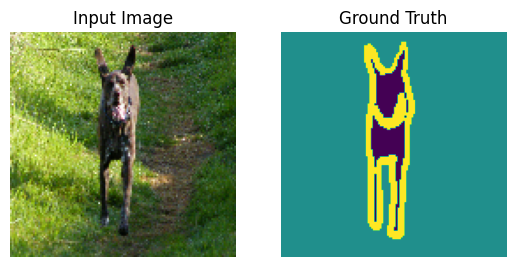

In [ ]:
display_dataset([sample_image, sample_mask])

Model

In [ ]:
# convolution block
def conv_block(inputs, num_filters):
  x = Conv2D(num_filters, 3, padding="same")(inputs)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Conv2D(num_filters, 3, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  return x

In [ ]:
# encoder block
def encoder_block(inputs, num_filters):
  x = conv_block(inputs, num_filters)
  p = MaxPool2D((2,2))(x)

  return x, p

In [ ]:
# decoder block
def decoder_block(inputs, skip, num_filters):
  x = Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(inputs)
  x = Concatenate()([x, skip])
  x = conv_block(x, num_filters)
  return x

In [ ]:
# unet
def build_unet(input_shape):
  inputs = Input(input_shape)

  # Encoder
  s1, p1 = encoder_block(inputs, 64)
  s2, p2 = encoder_block(p1, 128)
  s3, p3 = encoder_block(p2, 256)
  s4, p4 = encoder_block(p3, 512)

  # Bridge
  b1 = conv_block(p4, 1024)

  # Decoder
  d1 = decoder_block(b1, s4, 512)
  d2 = decoder_block(d1, s3, 256)
  d3 = decoder_block(d2, s2, 128)
  d4 = decoder_block(d3, s1, 64)

  outputs = Conv2D(3, 1, padding = "same", activation = "softmax")(d4)

  model = Model(inputs, outputs, name="UNET")
  return model

In [ ]:
input_shape = (128,128,3)
model = build_unet(input_shape)
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 128, 128, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_36 (BatchN  (None, 128, 128, 64  256        ['conv2d_38[0][0]']              
 ormalization)                  )                                                              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy")

Training

In [ ]:
NUM_EPOCHS = 25

TRAIN_LENGTH = info.splits["train"].num_examples
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

VALIDATION_SUBSPLIT = 5
TEST_LENGTH = info.splits["test"].num_examples
VALIDATION_STEPS = TEST_LENGTH // BATCH_SIZE // VALIDATION_SUBSPLIT

In [ ]:
history = model.fit(train_batches,
                    epochs = NUM_EPOCHS,
                    steps_per_epoch = STEPS_PER_EPOCH,
                    validation_steps = VALIDATION_STEPS,
                    validation_data = validation_batches)

Epoch 1/25
57/57 [==============================] - 93s 876ms/step - loss: 0.6838 - accuracy: 0.7160 - val_loss: 9.0371 - val_accuracy: 0.6736
Epoch 2/25
57/57 [==============================] - 66s 913ms/step - loss: 0.5443 - accuracy: 0.7842 - val_loss: 2.0844 - val_accuracy: 0.6979
Epoch 3/25
57/57 [==============================] - 50s 877ms/step - loss: 0.4652 - accuracy: 0.8181 - val_loss: 1.3842 - val_accuracy: 0.6862
Epoch 4/25
57/57 [==============================] - 50s 878ms/step - loss: 0.4148 - accuracy: 0.8393 - val_loss: 0.8907 - val_accuracy: 0.7375
Epoch 5/25
57/57 [==============================] - 51s 899ms/step - loss: 0.3745 - accuracy: 0.8544 - val_loss: 0.6970 - val_accuracy: 0.7717
Epoch 6/25
57/57 [==============================] - 50s 877ms/step - loss: 0.3486 - accuracy: 0.8643 - val_loss: 0.6934 - val_accuracy: 0.7997
Epoch 7/25
57/57 [==============================] - 52s 911ms/step - loss: 0.3298 - accuracy: 0.8720 - val_loss: 0.4666 - val_accuracy: 0.8335

Visualizing Results

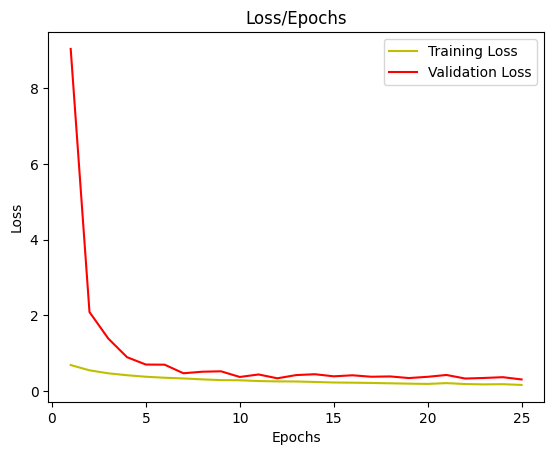

In [ ]:
# visualize loss/ val_los
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "y", label = "Training Loss")
plt.plot(epochs, val_loss, "r", label = "Validation Loss")

plt.title("Loss/Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

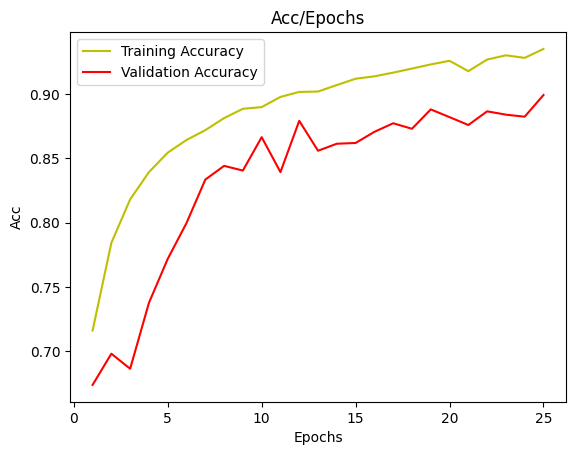

In [ ]:
# visualize acc/val_acc
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, "y", label = "Training Accuracy")
plt.plot(epochs, val_acc, "r", label = "Validation Accuracy")

plt.title("Acc/Epochs")
plt.xlabel("Epochs")
plt.ylabel("Acc")

plt.legend()
plt.show()

Prediction (Segmentation Results)

In [ ]:
"""
(batch_size, height, width, channels)  #  tensor shape
(batch_size, height, width)            #  argmax
(batch_size, height, width, 1)         #  unsqueeze
(height, width, 1)                     #  final
"""

'\n(batch_size, height, width, channels)  #  tensor shape\n(batch_size, height, width)            #  argmax\n(batch_size, height, width, 1)         #  unsqueeze\n(height, width, 1)                     #  final\n'

In [ ]:
def create_mask(prediction):
  prediction = tf.argmax(prediction, axis=-1)
  prediction = prediction[..., tf.newaxis]
  return prediction[0]

In [ ]:
def show_result(batches,num):
  for image, mask in batches.take(num):
    prediction = model.predict(image)
    display_dataset([image[0], mask[0], create_mask(prediction)])

2/2 [==============================] - 1s 167ms/step


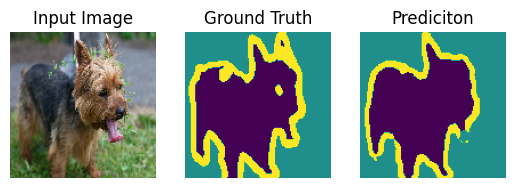

2/2 [==============================] - 0s 126ms/step


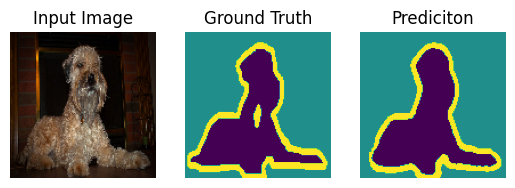

2/2 [==============================] - 0s 129ms/step


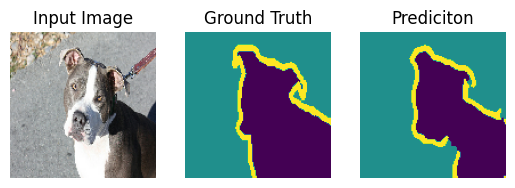

In [ ]:
show_result(test_batches.skip(5),3)